## pyxspec model test
2024.02.19

In [6]:
from xspec import *
import numpy as np
import matplotlib.pyplot as plt
from xrism_tools import XspecFit
X = XspecFit('dummy.hdf5')

initialize
 Solar Abundance Vector set to lpgs:  Lodders K., Palme H., Gail H.P., Landolt-Börnstein, New Series, vol VI/4B, pp 560–630 (2009) (Proto-solar)
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.
Model package mymodel successfully loaded.


In [37]:

lmodel_str = 'TBabs*bvapec'
lmodel = Model(lmodel_str)
def add_model(model, add_model, model_name=''):
    new_str = model + '+' + add_model
    emodel = Model(new_str, model_name)
    return emodel, new_str
lmodel, lmodel_str = add_model(lmodel_str, 'zgaus')

prams = X.get_parameters_name(lmodel)


Previous model: zgaus for source #: 1 has been rendered inactive.
-----------------
model name: TBabs
parameter name: nH
-----------------
model name: bvapec
parameter name: kT
parameter name: He
parameter name: C
parameter name: N
parameter name: O
parameter name: Ne
parameter name: Mg
parameter name: Al
parameter name: Si
parameter name: S
parameter name: Ar
parameter name: Ca
parameter name: Fe
parameter name: Ni
parameter name: Redshift
parameter name: Velocity
parameter name: norm
-----------------
model name: zgauss
parameter name: LineE
parameter name: Sigma
parameter name: Redshift
parameter name: norm

Model TBabs<1>*bvapec<2> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bvapec     kT         keV      6.50000      +/-  0.0          
   3    2   bvapec     He                  1.00000      frozen
   4    2   bvapec     C                   1.00000     

In [38]:
display(prams)

{1: {'TBabs': {'nH': {}}},
 2: {'bvapec': {'kT': {},
   'He': {},
   'C': {},
   'N': {},
   'O': {},
   'Ne': {},
   'Mg': {},
   'Al': {},
   'Si': {},
   'S': {},
   'Ar': {},
   'Ca': {},
   'Fe': {},
   'Ni': {},
   'Redshift': {},
   'Velocity': {},
   'norm': {}}},
 3: {'zgauss': {'LineE': {}, 'Sigma': {}, 'Redshift': {}, 'norm': {}}}}

2


z
[1.22135312e-17 1.22259368e-17 1.22383426e-17 1.22507486e-17
 1.22631548e-17 1.22755611e-17 1.22879677e-17 1.23003744e-17
 1.23127813e-17 1.23251884e-17 1.23375956e-17 1.23500031e-17
 1.23624107e-17 1.23748185e-17 1.23872265e-17 1.23996346e-17
 1.24120430e-17 1.24244515e-17 1.24368602e-17 1.24492691e-17
 1.24601554e-17 1.24703488e-17 1.24805405e-17 1.24907306e-17
 1.25009190e-17 1.25111058e-17 1.25212909e-17 1.25314743e-17
 1.25416561e-17 1.25518363e-17 1.25620148e-17 1.25721917e-17
 1.25823669e-17 1.25925405e-17 1.26027124e-17 1.26128827e-17
 1.26230514e-17 1.26332184e-17 1.26433838e-17 1.26535476e-17
 1.26637097e-17 1.26738702e-17 1.26840291e-17 1.26941864e-17
 1.27043420e-17 1.27144960e-17 1.27246485e-17 1.27347992e-17
 1.27449484e-17 1.27550960e-17 1.27652420e-17 1.27753863e-17
 1.27855290e-17 1.27956702e-17 1.28058097e-17 1.28159476e-17
 1.28260840e-17 1.28362187e-17 1.28463519e-17 1.28564834e-17
 1.28666134e-17 1.28767417e-17 1.28868685e-17 1.28969937e-17
 1.29071173e-17 1.2917

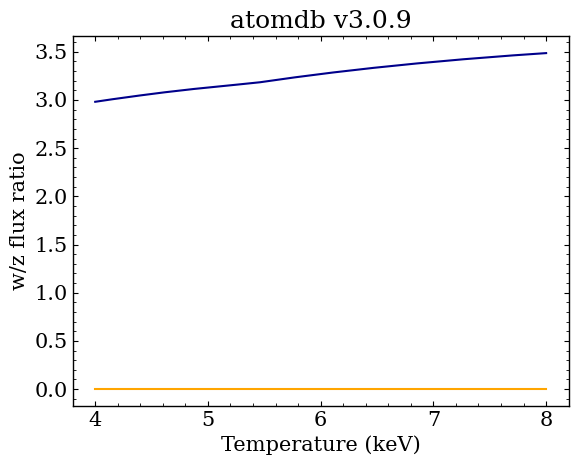

In [76]:
import pyatomdb


fig = plt.figure()
ax= fig.add_subplot(111)

sess = pyatomdb.spectrum.CIESession()
kTlist = np.linspace(4.0,8.0,1000)
for up in [2,3,4,5,6,7]:
    ldata = sess.return_line_emissivity(kTlist, 26, 25, up, 1)
    if up == 2:
        z = ldata['epsilon']
        print('z')
        print(ldata['epsilon'])
    if up == 7:
        w = ldata['epsilon']
        print('w')
        print(ldata['epsilon'])
ax.plot(kTlist, w/z,color='darkblue', label='apec')


sess = pyatomdb.spectrum.CIESession(linefile='/Users/keitatanaka/atomdb/spex_v3.07_line.fits', cocofile='/Users/keitatanaka/atomdb/spex_v3.07_coco.fits')
kTlist = np.linspace(4.0,8.0,1000)
for up in [2,3,4,5,6,7]:
    ldata = sess.return_line_emissivity(kTlist, 26, 25, up, 1)
    if up == 2:
        z = ldata['epsilon']
        print('z')
        print(ldata['epsilon'])
    if up == 7:
        w = ldata['epsilon']
        print('w')
        print(ldata['epsilon'])
ax.plot(kTlist, w/z, color='orange', label='spex')

ax.set_xlabel('Temperature (keV)')
ax.set_ylabel('w/z flux ratio')
ax.set_title('atomdb v3.0.9')
plt.show()
#fig.savefig('wz_ratio.png',dpi=300,transparent=True)

In [73]:
from astropy.io import fits

hdul = fits.open('/Users/keitatanaka/atomdb/spex_v3.07_line.fits')
header = hdul[0].header
display(header['SABUND_SOURCE'])
display(header['CHECKSUM'])


hdul = fits.open('/Users/keitatanaka/atomdb/spex_v3.07_coco.fits')
header = hdul[0].header
display(header['CHECKSUM'])

'AG89'

'TCnaVAmUTAmZTAmZ'

'l8bem7Zel7bel7Ze'

In [74]:
hdul = fits.open('/Users/keitatanaka/atomdb/apec_line.fits')
header = hdul[0].header
display(header['SABUND_SOURCE'])
display(header['CHECKSUM'])

hdul = fits.open('/Users/keitatanaka/atomdb/apec_coco.fits')
header = hdul[0].header
display(header['CHECKSUM'])

'AG89'

'kAagm2Wek8aek8We'

'l8bem7Zel7bel7Ze'

In [71]:
from astropy.io import fits

# 既存のFITSファイルを開く
filename = '/Users/keitatanaka/atomdb/spex_v3.07_line.fits'
with fits.open(filename, mode='update') as hdul:
    # 既存のヘッダーを取得
    header = hdul[0].header
    
    # 新しい情報を追加
    header['SABUND_SOURCE'] = ('AG89', 'this is a dummy for emissivity plot')
    header['CHECKSUM'] = ('kAagm2Wek8aek8We', 'this is a dummy for emissivity plot')
    
    # 変更を保存
    hdul.flush()  # flush() で変更をファイルに反映させる


filename = '/Users/keitatanaka/atomdb/spex_v3.07_coco.fits'
with fits.open(filename, mode='update') as hdul:
    # 既存のヘッダーを取得
    header = hdul[0].header
    
    # 新しい情報を追加
    header['CHECKSUM'] = ('l8bem7Zel7bel7Ze', 'this is a dummy for emissivity plot')
    
    # 変更を保存
    hdul.flush()  # flush() で変更をファイルに反映させる

6.636582878883439
6.700404447285952


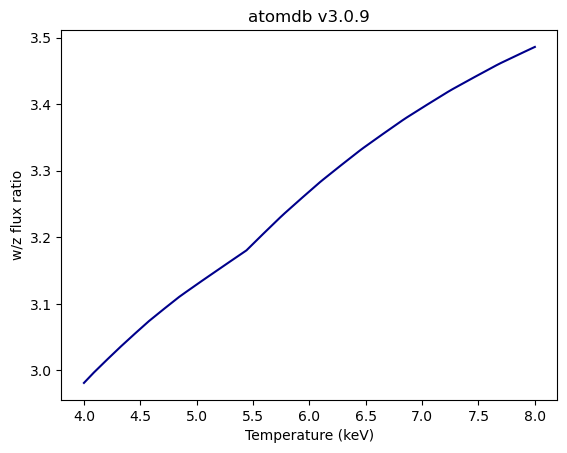

In [4]:
import pyatomdb
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax= fig.add_subplot(111)

sess = pyatomdb.spectrum.CIESession()
kTlist = np.linspace(4.0,8.0,1000)
for up in [2,3,4,5,6,7]:
    ldata = sess.return_line_emissivity(kTlist, 26, 25, up, 1)
    if up == 2:
        z = ldata['epsilon']
        print(ldata['energy'])
    if up == 7:
        w = ldata['epsilon']
        print(ldata['energy'])
# ax.plot(kTlist, w/z,color='darkblue', label='apec')

ax.plot(kTlist, w/z,color='darkblue', label='apec')

ax.set_xlabel('Temperature (keV)')
ax.set_ylabel('w/z flux ratio')
ax.set_title('atomdb v3.0.9')
plt.show()
#fig.savefig('wz_ratio.png',dpi=300,transparent=True)

In [ ]:
hdul = fits.open('/Users/keitatanaka/atomdb/spex_v3.07_line.fits')
data = hdul[150].data

col = data.columns
fe_mask = data['Element'] == 26
ion_mask = data['Ion'] == 25
mask = fe_mask & ion_mask
display(col)
display(data['Epsilon'][mask])
display(data['UpperLev'][mask])
display(data['LowerLev'][mask])

ColDefs(
    name = 'Lambda'; format = '1E'; unit = 'A'
    name = 'Lambda_Err'; format = '1E'; unit = 'A'
    name = 'Epsilon'; format = '1E'; unit = 'photons cm^3 s^-1'
    name = 'Epsilon_Err'; format = '1E'; unit = 'photons cm^3 s^-1'
    name = 'Element'; format = '1J'
    name = 'Ion'; format = '1J'
    name = 'UpperLev'; format = '1J'
    name = 'LowerLev'; format = '1J'
)

array([1.8948802e-22, 5.5272861e-22, 3.6005969e-22, ..., 8.5194050e-22,
       3.7612704e-22, 3.3674263e-22], dtype='>f4')

array([2, 2, 2, ..., 2, 2, 2], dtype='>i4')

array([1, 1, 1, ..., 1, 1, 1], dtype='>i4')

In [26]:
import h5py
import numpy as np
def print_wz_ratio(file, identifiers):
    """Print W/Z ratio and its error."""
    for num, identifier in enumerate(identifiers):
        with h5py.File(file, 'r') as file:
            print(f'Plotting {identifier}...')
            redshift = file[f'{identifier}/fitting_result/2/bvapec/Redshift']
            kT = file[f'{identifier}/fitting_result/2/bvapec/kT']
            abundance = file[f'{identifier}/fitting_result/2/bvapec/Fe']
            velocity = file[f'{identifier}/fitting_result/2/bvapec/Velocity']
            w_norm = file[f'{identifier}/fitting_result/4/zgauss_4/norm']
            z_norm = file[f'{identifier}/fitting_result/3/zgauss/norm']
            w_sigma = file[f'{identifier}/fitting_result/4/zgauss_4/Sigma']
            z_sigma = file[f'{identifier}/fitting_result/3/zgauss/Sigma']
            
            # Calculate W norm / Z norm ratio and its error
            w_z_ratio_value = w_norm['value'][...] / np.where(z_norm['value'][...] != 0, z_norm['value'][...], np.nan)
            w_z_ratio_err_ep = (w_norm['value'][...] + w_norm['ep'][...])/(z_norm['value'][...] + z_norm['em'][...]) - w_z_ratio_value
            w_z_ratio_err_em = w_z_ratio_value - (w_norm['value'][...] + w_norm['em'][...])/(z_norm['value'][...] + z_norm['ep'][...])
        
        print(f'Identifier: {identifier}...')
        print(f'kT: {kT}')
        print(f'Abundance: {abundance}')
        print(f'Velocity: {velocity}')
        print(f'W norm: {w_norm}')
        print(f'Z norm: {z_norm}')
        print(f'w/z ratio: {w_z_ratio_value}')
        print(f'w/z ratio error: +{w_z_ratio_err_ep}, -{w_z_ratio_err_em}')
        print('')

file = '/Volumes/SUNDISK_SSD/PKS_XRISM/repro/55Fe_gh_liner_cor/multi_analysis/ghf_lin_sim.hdf5'
identifiers = ['simultaneous_center_wz_rebin_1']
print_wz_ratio(file, identifiers)



Plotting simultaneous_center_wz_rebin_1...
Identifier: simultaneous_center_wz_rebin_1...
kT: <Closed HDF5 group>
Abundance: <Closed HDF5 group>
Velocity: <Closed HDF5 group>
W norm: <Closed HDF5 group>
Z norm: <Closed HDF5 group>
w/z ratio: 2.4798903050028405
w/z ratio error: +0.6958751514253452, -0.4956302249684652



initialize
 Solar Abundance Vector set to lpgs:  Lodders K., Palme H., Gail H.P., Landolt-Börnstein, New Series, vol VI/4B, pp 560–630 (2009) (Proto-solar)

Fit statistic  : C-Statistic                 1107.66     using 1320 bins, spectrum 1, group 1.
                 C-Statistic                  621.85     using 791 bins, spectrum 2, group 2.
Total fit statistic                          1729.51     with 2100 d.o.f.

Test statistic : Chi-Squared                 2321.05     using 2111 bins.
 Null hypothesis probability of 4.69e-04 with 2100 degrees of freedom
 Current data and model not fit yet.
Default fit statistic is set to: C-Statistic
   This will apply to all current and newly loaded spectra.

Fit statistic  : C-Statistic                 1107.66     using 1320 bins, spectrum 1, group 1.
                 C-Statistic                  621.85     using 791 bins, spectrum 2, group 2.
Total fit statistic                          1729.51     with 2100 d.o.f.

Test statistic : Chi-Squared

AttributeError: 'Axes' object has no attribute 'set_xlin'

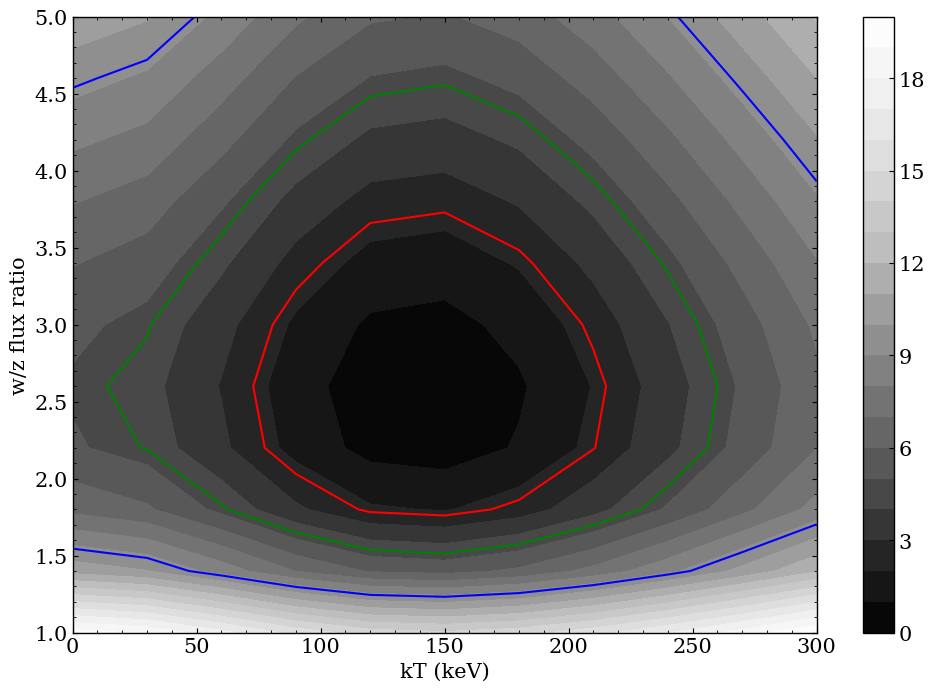

In [7]:
from xspec import *
from xrism_tools import XspecFit
import os

os.chdir('/Volumes/SUNDISK_SSD/PKS_XRISM/repro/55Fe_gh_liner_cor/multi_analysis')

X = XspecFit('dummy.hdf5')
Xset.restore('dzgaus_con.xcm')
X.plot_contour(17, 0, 300, 10, 26, 1.0, 5.0, 10)


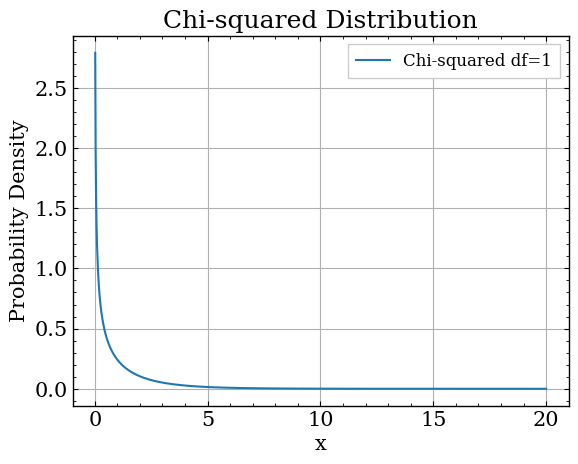

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 自由度
df = 1

# x軸の範囲を設定
x = np.linspace(0, 20, 1000)

# カイ二乗分布の確率密度関数を計算
pdf = chi2.pdf(x, df)

# プロット
plt.plot(x, pdf, label=f'Chi-squared df={df}')
plt.title('Chi-squared Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

95%信頼区間: [0.17, 0.99]


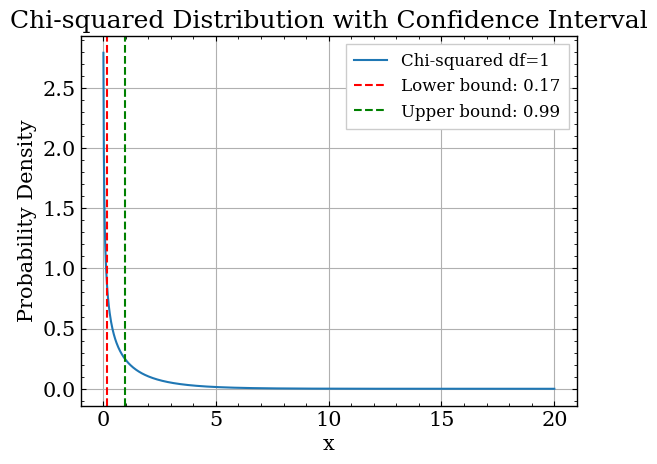

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 自由度
df = 1

# 信頼区間の累積確率（95%信頼区間）
lower_percentile = 0.32
upper_percentile = 0.68

# 下位と上位のカイ二乗値を計算
lower_bound = chi2.ppf(lower_percentile, df)
upper_bound = chi2.ppf(upper_percentile, df)

# 結果表示
print(f"95%信頼区間: [{lower_bound:.2f}, {upper_bound:.2f}]")

# プロット
x = np.linspace(0, 20, 1000)
pdf = chi2.pdf(x, df)

plt.plot(x, pdf, label=f'Chi-squared df={df}')
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
plt.title('Chi-squared Distribution with Confidence Interval')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from scipy.stats import norm

# 標準正規分布のCDFを使用して1σ範囲の確率を計算
sigma = 2
probability_1sigma = norm.cdf(sigma) - norm.cdf(-sigma)

# 結果表示
print(f"{sigma}σ範囲に含まれる確率: {probability_1sigma * 100:.2f}%")

2σ範囲に含まれる確率: 95.45%


In [25]:
from scipy.stats import chi2, norm

# 自由度1のカイ二乗分布
df = 1

# 正規分布での1σ範囲の確率
sigma_range_prob = norm.cdf(1) - norm.cdf(-1)  # 68.27%

# 1σに対応するカイ二乗分布の信頼区間
lower_bound_1sigma = chi2.ppf((1 - sigma_range_prob) / 2, df)
upper_bound_1sigma = chi2.ppf(1 - (1 - sigma_range_prob) / 2, df)

# 正規分布での2σ範囲の確率
sigma_2_range_prob = norm.cdf(2) - norm.cdf(-2)  # 95.45%

# 2σに対応するカイ二乗分布の信頼区間
lower_bound_2sigma = chi2.ppf((1 - sigma_2_range_prob) / 2, df)
upper_bound_2sigma = chi2.ppf(1 - (1 - sigma_2_range_prob) / 2, df)

# 結果表示
print(f"1σ範囲のカイ二乗信頼区間: [{lower_bound_1sigma:.2f}, {upper_bound_1sigma:.2f}]")
print(f"2σ範囲のカイ二乗信頼区間: [{lower_bound_2sigma:.2f}, {upper_bound_2sigma:.2f}]")

1σ範囲のカイ二乗信頼区間: [0.04, 1.99]
2σ範囲のカイ二乗信頼区間: [0.00, 5.19]
